# Multiple Output Linear Regression Training  
<br>
In this case, we are dealing with **2-D bias**:
$$\large b=\left[ \begin{array}{c} b_1 \\ b_2\end{array} \right]$$ 

In [1]:
import torch as pt

Defining Dataset in 2D and Trainloader:

In [2]:
from torch.utils.data import Dataset, DataLoader 

In [3]:
class Data2D(Dataset):
    def __init__(self):
        self.x=pt.zeros(20,2)
        self.x[:,0]=pt.arange(-1,1,0.1)
        self.x[:,1]=pt.arange(-1,1,0.1)
        self.w=pt.tensor([[1.0],[1.0]])
        self.b=pt.tensor([[1.0,-1.0]])
        
        self.f=pt.mm(self.x,self.w)+self.b 
        self.y=self.f+0.45*pt.randn(self.x.shape[0],1)
        
        self.len= self.x.shape[0]
        
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

In [4]:
dataset=Data2D()

Defining the `trainloader`:

In [5]:
trainloader= DataLoader(dataset=dataset,batch_size=1)

Defining the linear model:

In [6]:
import torch.nn as nn

In [7]:
class LR(nn.Module):
    def __init__(self,in_size,out_size):
        super(LR,self).__init__()
        self.linear=nn.Linear(in_size,out_size)
        
    def forward(self,x):
        out= self.linear(x)
        return out    

**Another option:**
<br>Instead of programming the last, you can write the next expression: <br>``model= nn.Linear(2,2)``

Defining the objective function ***Mean Square Error*** on **Loss**: 

In [8]:
criterion= nn.MSELoss()

Creating the program:

In [9]:
LOSS=[]
#model=nn.Linear(2,2)
model= LR(2,2)
optimizer= pt.optim.SGD(model.parameters(),lr=0.01)
for epoch in range(25):
    for x,y in trainloader:
        yhat=model(x)
        loss=criterion(yhat,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    LOSS.append(float(loss))

Checking the best-set parameters: 

In [10]:
parameters=list(model.parameters())
print('w={0}\nb={1}'.format(parameters[0].data,parameters[1].data))

w=tensor([[0.6459, 1.0394],
        [1.1279, 0.5665]])
b=tensor([ 1.0317, -0.9528])


Graphing Loss:

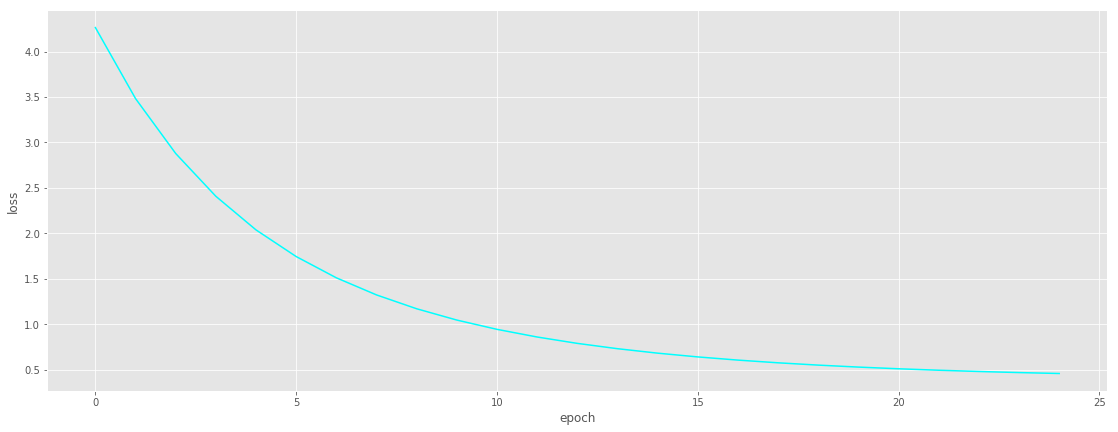

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(19,7))
plt.style.use('ggplot')
plt.plot(LOSS,c='cyan')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()